In [3]:
# numpy 数组和python list处理能力差距
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [4]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 20.8 ms, sys: 15.4 ms, total: 36.2 ms
Wall time: 40 ms


In [5]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 658 ms, sys: 230 ms, total: 888 ms
Wall time: 901 ms


## 4.1 NumPy 的 ndarray：一种多维数组 对象

In [6]:
import numpy as np

#Generate some random data
data = np.random.randn(2,3)

In [7]:
data

array([[-1.19883911, -0.64054642, -0.84064809],
       [-1.0213348 ,  0.70955405, -2.51231938]])

In [8]:
data * 10

array([[-11.98839109,  -6.40546416,  -8.40648089],
       [-10.21334797,   7.09554054, -25.12319381]])

In [9]:
data + data

array([[-2.39767822, -1.28109283, -1.68129618],
       [-2.04266959,  1.41910811, -5.02463876]])

In [10]:
#ndarray 是一个通用的同构数据多维容器，也就是说，其中的所有元素必须是 相同类型的。每个数组都有一个 shape（一个表示各维度大小的元组）和一个 dtype（一个用于说明数组数据类型的对象）：
data.shape

(2, 3)

In [11]:
data.dtype

dtype('float64')

### 4.1.1 创建ndarray

In [12]:
data1 = [6, 7.5, 8, 0, 1]

arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [13]:
# 嵌套序列（比如由一组等长列表组成的列表）将会被转换为一个多维数组
data2 = [[1,2,3,4], [5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [14]:
# 因为 data2 是列表的列表，NumPy 数组 arr2 的两个维度的 shape 是从 data2 引 入的。可以用属性 ndim 和 shape 验证：
arr2.ndim

2

In [15]:
arr2.shape

(2, 4)

In [16]:
#除非特别说明（稍后将会详细介绍），np.array 会尝试为新建的这个数组推断 出一个较为合适的数据类型。数据类型保存在一个特殊的 dtype 对象中
arr1.dtype

dtype('float64')

In [17]:
arr2.dtype

dtype('int64')

In [18]:
# zeros 和 ones 分别 可以创建指定长度或形状的全 0 或全 1 数组。empty 可以创建一个没有任何具 体值的数组。要用这些方法创建多维数组，只需传入一个表示形状的元组即 可：
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [20]:
np.empty((2,3,2))

array([[[1.28822975e-231, 1.73059443e-077],
        [2.96439388e-323, 0.00000000e+000],
        [2.12199579e-314, 1.16095484e-028]],

       [[6.97283618e+228, 3.68008723e-110],
        [6.48224638e+170, 3.67145870e+228],
        [1.60895342e+295, 8.34402697e-309]]])

In [21]:
# 注意：认为 np.empty 会返回全 0 数组的想法是不安全的。很多情况下（如前所 示），它返回的都是一些未初始化的垃圾值

In [22]:
#arange 是 Python 内置函数 range 的数组版：
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [23]:
# 由于 NumPy 关注的是数值计算，因此，如果 没有特别指定，数据类型基本都是 float64（浮点数）

### ndarray的数据类型

In [24]:
# dtype（数据类型）是一个特殊的对象，它含有 ndarray 将一块内存解释为特定 数据类型所需的信息
arr1 = np.array([1,2,3], dtype=np.float64) #标准的双精度浮点值（即 Python 中的 float 对象）需要占用 8 字节（即 64 位）。
arr2 = np.array([1,2,3], dtype=np.int32)

In [25]:
arr1.dtype

dtype('float64')

In [26]:
arr2.dtype

dtype('int32')

In [27]:
# 记不住这些 NumPy 的 dtype 也没关系，新手更是如此。通常只需要知道 你所处理的数据的大致类型是浮点数、复数、整数、布尔值、字符串，还是普 通的 Python 对象即可。当你需要控制数据在内存和磁盘中的存储方式时（尤其 是对大数据集），那就得了解如何控制存储类型

In [28]:
# 你可以通过 ndarray 的 astype 方法明确地将一个数组从一个 dtype 转换成另一 个 dtype
arr = np.array([1,2,3,4,5])
arr.dtype

dtype('int64')

In [29]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [30]:
#在本例中，整数被转换成了浮点数。如果将浮点数转换成整数，则小数部分将 会被截取删除

In [31]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [32]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [33]:
# 如果某字符串数组表示的全是数字，也可以用 astype 将其转换为数值形式
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)
#注意：使用 numpy.string_类型时，一定要小心，因为 NumPy 的字符串数据是 大小固定的，发生截取时，不会发出警告。pandas 提供了更多非数值数据的便 利的处理方法。

array([ 1.25, -9.6 , 42.  ])

In [34]:
# 如果转换过程因为某种原因而失败了（比如某个不能被转换为 float64 的字符 串），就会引发一个 ValueError。这里，我比较懒，写的是 float 而不是 np.float64；NumPy 很聪明，它会将 Python 类型映射到等价的 dtype 上。

In [35]:
int_array = np.arange(10)
int_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [37]:
# 你还可以用简洁的类型代码来表示 dtype：
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

In [38]:
# 笔记：调用 astype 总会创建一个新的数组（一个数据的备份），即使新的 dtype 与旧的 dtype 相同。

### NumPy 数组的运算

In [39]:
# 数组很重要，因为它使你不用编写循环即可对数据执行批量运算。NumPy 用户 称其为矢量化（vectorization）。大小相等的数组之间的任何算术运算都会将 运算应用到元素级
arr = np.array([[1.,2.,3.], [4.,5.,6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [40]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [41]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [42]:
# 数组与标量的算术运算会将标量值传播到各个元素
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [43]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [44]:
# 大小相同的数组之间的比较会生成布尔值数组：
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [45]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

In [46]:
# 不同大小的数组之间的运算叫做广播（broadcasting）

### 基本的索引和切片

In [47]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
arr[5]

5

In [49]:
arr[5:8]

array([5, 6, 7])

In [50]:
arr[5:8] = 12

In [51]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [52]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [53]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [54]:
# 数组切片是原始数组的视图。这意味着数据不会被复制，视图上的任 何修改都会直接反映到源数组上。
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [55]:
#如果你刚开始接触 NumPy，可能会对此感到惊讶（尤其是当你曾经用过其他热 衷于复制数组数据的编程语言）。由于 NumPy 的设计目的是处理大数据，所以 你可以想象一下，假如 NumPy 坚持要将数据复制来复制去的话会产生何等的性 能和内存问题。

In [56]:
# 如果你想要得到的是 ndarray 切片的一份副本而非视图，就需要明确地 进行复制操作，例如 arr[5:8].copy()。
arr_copy = arr[5:8].copy()
arr_copy

array([64, 64, 64])

In [57]:
# 对于高维度数组，能做的事情更多。在一个二维数组中，各索引位置上的元素 不再是标量而是一维数组：
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [58]:
# 因此，可以对各个元素进行递归访问，但这样需要做的事情有点多。你可以传 入一个以逗号隔开的索引列表来选取单个元素。也就是说，下面两种方式是等 价的：
arr2d[0][2]

3

In [59]:
arr2d[0,2]

3

In [60]:
# 在多维数组中，如果省略了后面的索引，则返回对象会是一个维度低一点的 ndarray（它含有高一级维度上的所有数据）
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [61]:
# arr3d[0]是一个 2×3 数组：
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [62]:
# 标量值和数组都可以被赋值给 arr3d[0]：
old_values = arr3d[0].copy()
old_values

array([[1, 2, 3],
       [4, 5, 6]])

In [63]:
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [64]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [65]:
# 相似的，arr3d[1,0]可以访问索引以(1,0)开头的那些值（以一维数组的形式返 回）：
arr3d[1,0]

array([7, 8, 9])

In [66]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [67]:
x[0]

array([7, 8, 9])

### 切片索引

In [68]:
# ndarray 的切片语法跟 Python 列表这样的一维对象差不多
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [69]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [70]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [71]:
arr[:2]

array([0, 1])

In [72]:
# 可以看出，它是沿着第 0 轴（即第一个轴）切片的。也就是说，切片是沿着一 个轴向选取元素的。表达式 arr2d[:2]可以被认为是“选取 arr2d 的前两 行”
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [73]:
# 像这样进行切片时，只能得到相同维数的数组视图。通过将整数索引和切片混 合，可以得到低维度的切片。 例如，我可以选取第二行的前两列：
arr2d[1, :2]

array([4, 5])

In [74]:
# 相似的，还可以选择第三列的前两行
arr2d[:2, 2]

array([3, 6])

In [75]:
# 注意，“只有冒号”表示选取整个轴，因此你可以像 下面这样只对高维轴进行切片：
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [76]:
# 自然，对切片表达式的赋值操作也会被扩散到整个选区
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 布尔型索引

In [78]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [79]:
data = np.random.randn(7, 4)
data

array([[-0.15832233,  0.58411107, -1.37473951, -0.95990586],
       [ 0.56142951,  1.79445046,  1.20493182, -1.46002529],
       [-0.54548723, -0.22441239, -0.60046139,  0.34958897],
       [-0.92571312, -1.17666621,  0.80886672, -0.73354966],
       [-0.50043215, -0.76687056, -0.3849536 , -0.38251817],
       [ 0.84743156,  0.89729825, -0.67239947,  1.11395913],
       [ 0.21514858,  0.03099138, -0.94368283,  0.53216254]])

In [88]:
# 假设每个名字都对应 data 数组中的一行，而我们想要选出对应于名字"Bob"的 所有行。跟算术运算一样，数组的比较运算（如==）也是矢量化的。因此，对 names 和字符串"Bob"的比较运算将会产生一个布尔型数组：
names == 'Bob'

True

In [89]:
data[names == 'Bob']

array([[[-0.15832233,  0.58411107, -1.37473951, -0.95990586],
        [ 0.56142951,  1.79445046,  1.20493182, -1.46002529],
        [-0.54548723, -0.22441239, -0.60046139,  0.34958897],
        [-0.92571312, -1.17666621,  0.80886672, -0.73354966],
        [-0.50043215, -0.76687056, -0.3849536 , -0.38251817],
        [ 0.84743156,  0.89729825, -0.67239947,  1.11395913],
        [ 0.21514858,  0.03099138, -0.94368283,  0.53216254]]])

In [90]:
# 这里有点问题，和书上的结果不一致，目前不知道问题出在哪里？

### 花式索引

In [92]:
#花式索引（Fancy indexing）是一个 NumPy 术语，它指的是利用整数数组进行 索引
arr = np.empty((8, 4))
arr

array([[1.28822975e-231, 1.28822975e-231, 8.89318163e-323,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        5.03093281e-037],
       [1.28822975e-231, 1.28822975e-231, 8.37170571e-144,
        5.25807790e+170],
       [3.83819517e+151, 1.47721841e+179, 8.37404147e+242,
        4.50622280e-144],
       [1.16071308e-028, 4.91416481e-062, 8.07332420e+169,
        6.12389265e-062],
       [1.72337360e+184, 1.03724457e-314, 2.68677916e+154,
        2.68677916e+154]])

In [94]:
for i in range(8):
    arr[i] = i
    
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [96]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [97]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [99]:
# 一次传入多个索引数组会有一点特别。它返回的是一个一维数组，其中的元素 对应各个索引元组
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [100]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]
# 最终选出的是元素(1,0)、(5,3)、(7,1)和(2,2)。无论数组是多少维的，花式 索引总是一维的。

array([ 4, 23, 29, 10])

In [101]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [102]:
#记住，花式索引跟切片不一样，它总是将数据复制到新数组中

### 数组转置和轴对换

In [104]:
#转置是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操 作）。数组不仅有 transpose 方法，还有一个特殊的 T 属性
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [105]:
# 矩阵的转置
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [108]:
arr = np.random.randn(6, 3)
arr

array([[ 1.93996626,  0.21207017,  1.51941312],
       [-0.17036672, -0.9469447 ,  1.62940682],
       [ 0.93758473, -2.00617267, -0.56562972],
       [ 0.29456961,  1.15519597,  1.69690789],
       [ 0.5260361 ,  0.71931647,  0.42281528],
       [ 0.03282096, -0.28642596, -0.11640505]])

In [109]:
np.dot(arr.T, arr)

array([[ 5.0361215 , -0.59894873,  2.85814078],
       [-0.59894873,  6.90034057,  2.21175551],
       [ 2.85814078,  2.21175551,  8.35533905]])

In [110]:
# 对于高维数组，transpose 需要得到一个由轴编号组成的元组才能对这些轴进 行转置（比较费脑子）：
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [111]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [112]:
# 这里，第一个轴被换成了第二个，第二个轴被换成了第一个，最后一个轴不 变。

In [113]:
# 简单的转置可以使用.T，它其实就是进行轴对换而已。ndarray 还有一个 swapaxes 方法，它需要接受一对轴编号
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [114]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [115]:
arr.shape

(2, 2, 4)

In [116]:
# swapaxes 也是返回源数据的视图（不会进行任何复制操作）

## 4.2 通用函数：快速的元素级数组函数

In [118]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [119]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [120]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [121]:
# 这些都是一元（unary）ufunc。另外一些（如 add 或 maximum）接受 2 个数组 （因此也叫二元（binary）ufunc），并返回一个结果数组
x = np.random.randn(8)
x

array([-0.5785364 ,  0.25873733,  1.39712105,  0.44888526,  0.41360417,
        0.01372912,  0.06941449, -0.02602843])

In [122]:
y = np.random.randn(8)
y

array([-0.02366963, -0.37904048,  2.10158122, -0.94828207,  0.95549104,
       -1.02552493,  1.74305476,  2.02116823])

In [123]:
np.maximum(x, y)
# numpy.maximum 计算了 x 和 y 中元素级别最大的元素

array([-0.02366963,  0.25873733,  2.10158122,  0.44888526,  0.95549104,
        0.01372912,  1.74305476,  2.02116823])

In [124]:
# 虽然并不常见，但有些 ufunc 的确可以返回多个数组。modf 就是一个例子，它 是 Python 内置函数 divmod 的矢量化版本，它会返回浮点数数组的小数和整数 部分：
arr = np.random.randn(7) * 5
arr

array([ 1.96060611, -2.80645512, -8.09864174,  2.01595541,  4.06383797,
       -7.15643706, 10.82267716])

In [126]:
reminder, whole_part = np.modf(arr)
reminder

array([ 0.96060611, -0.80645512, -0.09864174,  0.01595541,  0.06383797,
       -0.15643706,  0.82267716])

In [127]:
whole_part

array([ 1., -2., -8.,  2.,  4., -7., 10.])

In [128]:
# Ufuncs 可以接受一个 out 可选参数，这样就能在数组原地进行操作
arr

array([ 1.96060611, -2.80645512, -8.09864174,  2.01595541,  4.06383797,
       -7.15643706, 10.82267716])

In [132]:
np.sqrt(arr)

array([1.18330742,        nan,        nan, 1.19157184, 1.41982264,
              nan, 1.8137761 ])

In [135]:
np.sqrt(arr, arr)

array([1.08779935,        nan,        nan, 1.09159142, 1.19156311,
              nan, 1.34676505])

In [136]:
arr

array([1.08779935,        nan,        nan, 1.09159142, 1.19156311,
              nan, 1.34676505])

In [137]:
np.power(2,3)

8

In [138]:
np.mod(15, 6)

3

## 4.3 利用数组进行数据处理

In [159]:
# NumPy 数组使你可以将许多种数据处理任务表述为简洁的数组表达式（否则需 要编写循环）。用数组表达式代替循环的做法，通常被称为矢量化。一般来 说，矢量化数组运算要比等价的纯 Python 方式快上一两个数量级（甚至更
#多），尤其是各种数值计算。在后面内容中（见附录 A）我将介绍广播，这是 一种针对矢量化计算的强大手段。

In [160]:
#作为简单的例子，假设我们想要在一组值（网格型）上计算函数 sqrt(x^2+y^2)。np.meshgrid 函数接受两个一维数组，并产生两个二维矩阵 （对应于两个数组中所有的(x,y)对）：
points = np.arange(-5,5,0.01) #1000 equal spaced points
points

array([-5.0000000e+00, -4.9900000e+00, -4.9800000e+00, -4.9700000e+00,
       -4.9600000e+00, -4.9500000e+00, -4.9400000e+00, -4.9300000e+00,
       -4.9200000e+00, -4.9100000e+00, -4.9000000e+00, -4.8900000e+00,
       -4.8800000e+00, -4.8700000e+00, -4.8600000e+00, -4.8500000e+00,
       -4.8400000e+00, -4.8300000e+00, -4.8200000e+00, -4.8100000e+00,
       -4.8000000e+00, -4.7900000e+00, -4.7800000e+00, -4.7700000e+00,
       -4.7600000e+00, -4.7500000e+00, -4.7400000e+00, -4.7300000e+00,
       -4.7200000e+00, -4.7100000e+00, -4.7000000e+00, -4.6900000e+00,
       -4.6800000e+00, -4.6700000e+00, -4.6600000e+00, -4.6500000e+00,
       -4.6400000e+00, -4.6300000e+00, -4.6200000e+00, -4.6100000e+00,
       -4.6000000e+00, -4.5900000e+00, -4.5800000e+00, -4.5700000e+00,
       -4.5600000e+00, -4.5500000e+00, -4.5400000e+00, -4.5300000e+00,
       -4.5200000e+00, -4.5100000e+00, -4.5000000e+00, -4.4900000e+00,
       -4.4800000e+00, -4.4700000e+00, -4.4600000e+00, -4.4500000e+00,
      

In [161]:
xs, ys = np.meshgrid(points, points)
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [162]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [163]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

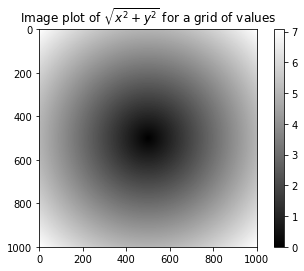

In [164]:
# 可视化
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray);plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

#### 将条件逻辑表述为数组运算

In [165]:
# numpy.where 函数是三元表达式 x if condition else y 的矢量化版本。假设 我们有一个布尔数组和两个值数组：
xarr = np.array([1.1,1.2,1.3,1.4,1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

#假设我们想要根据 cond 中的值选取 xarr 和 yarr 的值：当 cond 中的值为 True 时，选取 xarr 的值，否则从 yarr 中选取。列表推导式的写法应该如下所示：
result = [(x if c else y)
             for x,y,c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [166]:
# 这有几个问题。第一，它对大数组的处理速度不是很快（因为所有工作都是由 纯 Python 完成的）。第二，无法用于多维数组。若使用 np.where，则可以将 该功能写得非常简洁：
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [167]:
# np.where 的第二个和第三个参数不必是数组，它们都可以是标量值。在数据分 析工作中，where 通常用于根据另一个数组而产生一个新的数组。假设有一个 由随机数据组成的矩阵，你希望将所有正值替换为 2，将所有负值替换为－2。 若利用 np.where，则会非常简单
arr = np.random.randn(4, 4)

In [168]:
arr

array([[ 0.21502353, -1.14337425,  2.22791825,  1.1473147 ],
       [-0.84838876,  0.44178581,  0.40929073,  0.15973073],
       [-0.14010695, -0.83090132,  0.92801448,  0.10025856],
       [ 1.38914385, -0.40109602, -0.29442426, -0.54852755]])

In [169]:
arr > 0

array([[ True, False,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False, False, False]])

In [170]:
np.where(arr > 0, 2, -2)

array([[ 2, -2,  2,  2],
       [-2,  2,  2,  2],
       [-2, -2,  2,  2],
       [ 2, -2, -2, -2]])

In [171]:
# 使用 np.where，可以将标量和数组结合起来。例如，我可用常数 2 替换 arr 中 所有正的值：
np.where(arr > 0, 2, arr) # set only positive values to 2
# 传递给 where 的数组大小可以不相等，甚至可以是标量值。

array([[ 2.        , -1.14337425,  2.        ,  2.        ],
       [-0.84838876,  2.        ,  2.        ,  2.        ],
       [-0.14010695, -0.83090132,  2.        ,  2.        ],
       [ 2.        , -0.40109602, -0.29442426, -0.54852755]])

#### 数学和统计方法

In [172]:
# 可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。 sum、mean 以及标准差 std 等聚合计算（aggregation，通常叫做约简 （reduction））既可以当做数组的实例方法调用，也可以当做顶级 NumPy 函数 使用。

#这里，我生成了一些正态分布随机数据，然后做了聚类统计
arr = np.random.randn(5, 4)
arr

array([[ 0.77985859,  1.28840991, -0.94428422,  1.03600642],
       [ 1.7993233 , -0.45158779,  1.01537968, -0.29212142],
       [-0.25793912, -0.23459347,  0.41244227, -0.72183465],
       [-0.26862468, -0.99956133, -1.62727597, -0.04856356],
       [-1.54691475, -0.87320788, -0.21427757,  0.84256188]])

In [173]:
arr.mean()

-0.06534021825909135

In [174]:
np.mean(arr)

-0.06534021825909135

In [175]:
arr.sum()

-1.306804365181827

In [176]:
np.sum(arr)

-1.306804365181827

In [177]:
# mean 和 sum 这类的函数可以接受一个 axis 选项参数，用于计算该轴向上的统 计值，最终结果是一个少一维的数组：
arr.mean(axis=1)

array([ 0.53999767,  0.51774844, -0.20048124, -0.73600638, -0.44795958])

In [178]:
arr.sum(axis=0)

array([ 0.50570334, -1.27054056, -1.35801581,  0.81604867])

In [179]:
# 这里，arr.mean(1)是“计算行的平均值”，arr.sum(0)是“计算每列的和”。

In [180]:
# 其他如 cumsum 和 cumprod 之类的方法则不聚合，而是产生一个由中间结果组成 的数组
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [181]:
arr = np.arange(8)
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [182]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [183]:
# 在多维数组中，累加函数（如 cumsum）返回的是同样大小的数组，但是会根据 每个低维的切片沿着标记轴计算部分聚类
arr = np.array([[0,1,2], [3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [184]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [185]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

#### 用于布尔数组的方法

In [189]:
# 在上面这些方法中，布尔值会被强制转换为 1（True）和 0（False）。因此， sum 经常被用来对布尔型数组中的 True 值计数
arr = np.random.randn(100)
arr

array([-0.43359168,  0.77709914, -1.46755867,  0.01178264, -1.3891237 ,
       -0.03848472,  1.22782731, -1.33866377, -0.16411119,  1.89851115,
        2.02587116,  0.11162325,  1.12884346,  0.77201205,  0.38151678,
        1.09531589,  1.45553929,  0.50372001, -1.65086774,  0.14734875,
        0.33507653, -0.84478131,  0.89735358, -0.36546444, -2.13239856,
       -0.58447922,  0.07522656,  0.19097518, -0.55407156,  1.92250124,
        0.02880925, -1.74998608, -0.7465885 ,  0.25670936,  1.54744268,
       -0.4774331 ,  0.59986995,  0.80770358, -0.84075717, -0.64494275,
       -2.01278018, -0.81610742, -1.34262524,  0.53468568,  1.5067425 ,
       -0.18714932,  0.29707197,  0.24350259,  1.00348803, -1.43959317,
       -0.14600038, -0.16466833,  0.39097447,  0.79625978, -0.9931352 ,
        1.37492041, -0.03573701, -0.67642136,  0.64058395, -1.44964532,
       -0.89903098, -1.02019309, -1.38495227, -0.44511676,  0.28457483,
       -0.20861479, -1.5872822 , -0.35546791, -0.32775119,  0.95

In [190]:
(arr > 0).sum()

56

In [191]:
# 另外还有两个方法 any 和 all，它们对布尔型数组非常有用。any 用于测试数组 中是否存在一个或多个 True，而 all 则检查数组中所有值是否都是 True
bools = np.array([False, False, True, False])
bools.any()

True

In [192]:
bools.all()

False

In [193]:
# 这两个方法也能用于非布尔型数组，所有非 0 元素将会被当做 True

#### 排序

In [194]:
# NumPy 数组也可以通过 sort 方法就地排序
arr = np.random.randn(6)
arr

array([ 0.7907185 ,  0.19340763,  0.33667585, -0.25773484, -0.4686795 ,
       -1.58388122])

In [196]:
arr.sort()
arr

array([-1.58388122, -0.4686795 , -0.25773484,  0.19340763,  0.33667585,
        0.7907185 ])

In [197]:
# 多维数组可以在任何一个轴向上进行排序，只需将轴编号传给 sort 即可
arr = np.random.randn(5, 3)
arr

array([[ 0.39542314,  2.28645698,  0.40756876],
       [ 0.58085482,  0.80834995, -1.05647446],
       [-0.53518977, -1.78696388,  0.56631839],
       [-0.16825314, -0.31004766, -0.70349843],
       [-0.6019499 , -1.440159  , -0.92525707]])

In [199]:
arr.sort(1)
arr

array([[ 0.39542314,  0.40756876,  2.28645698],
       [-1.05647446,  0.58085482,  0.80834995],
       [-1.78696388, -0.53518977,  0.56631839],
       [-0.70349843, -0.31004766, -0.16825314],
       [-1.440159  , -0.92525707, -0.6019499 ]])

In [200]:
# 顶级方法 np.sort 返回的是数组的已排序副本，而就地排序则会修改数组本 身。计算数组分位数最简单的办法是对其进行排序，然后选取特定位置的值
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.725701849493152

#### 唯一化以及其它的集合逻辑

In [201]:
# NumPy 提供了一些针对一维 ndarray 的基本集合运算。最常用的可能要数 np.unique 了，它用于找出数组中的唯一值并返回已排序的结果：
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [202]:
ints = np.array([3,3,4,5,6,1,2,1,2,3,4,5,6])
np.unique(ints)

array([1, 2, 3, 4, 5, 6])

In [203]:
# 拿跟 np.unique 等价的纯 Python 代码来对比一下
sorted(set(names))

['Bob', 'Joe', 'Will']

In [205]:
# 另一个函数 np.in1d 用于测试一个数组中的值在另一个数组中的成员资格，返 回一个布尔型数组
values = np.array([6,0,0,3,2,5,6])
np.in1d
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

## 4.4 用于数组的文件输入输出

In [206]:
# NumPy 能够读写磁盘上的文本数据或二进制数据。这一小节只讨论 NumPy 的内 置二进制格式，因为更多的用户会使用 pandas 或其它工具加载文本或表格数据
#np.save 和 np.load 是读写磁盘数组数据的两个主要函数。默认情况下，数组 是以未压缩的原始二进制格式保存在扩展名为.npy 的文件中的
arr = np.arange(10)
np.save('some_array', arr)

In [207]:
# 如果文件路径末尾没有扩展名.npy，则该扩展名会被自动加上。然后就可以通 过 np.load 读取磁盘上的数组
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [208]:
# 通过 np.savez 可以将多个数组保存到一个未压缩文件中，将数组以关键字参数 的形式传入即可
np.savez('array_archive.npz', a=arr, b=arr)

In [209]:
#加载.npz 文件时，你会得到一个类似字典的对象，该对象会对各个数组进行延 迟加载
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [210]:
# 如果数据压缩的很好，就可以使用 numpy.savez_compressed
np.savez_compressed('array_compressed.npz', a=arr, b=arr)

## 线性代数

In [211]:
# NumPy 提供了一个用 于矩阵乘法的 dot 函数（既是一个数组方法也是 numpy 命名空间中的一个函 数）：
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [214]:
x.shape

(2, 3)

In [215]:
y.shape

(3, 2)

In [216]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [217]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [218]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [219]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [220]:
# 一个二维数组跟一个大小合适的一维数组的矩阵点积运算之后将会得到一个一 维数组：
np.dot(x, np.ones(3))

array([ 6., 15.])

In [221]:
# @符（类似 Python 3.5）也可以用作中缀运算符，进行矩阵乘法
x @ np.ones(3)

array([ 6., 15.])

In [223]:
#numpy.linalg 中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东 西。它们跟 MATLAB 和 R 等语言所使用的是相同的行业标准线性代数库，如 BLAS、LAPACK、Intel MKL（Math Kernel Library，可能有，取决于你的 NumPy 版本）等：
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
mat

array([[ 1.25049396, -0.4342797 , -2.01263671, -1.06834796,  1.69028561],
       [-0.4342797 ,  5.77824281,  0.77235901,  2.59069725,  1.64990271],
       [-2.01263671,  0.77235901,  5.04369802, -0.18588786, -2.57450797],
       [-1.06834796,  2.59069725, -0.18588786,  4.24530106, -0.36305696],
       [ 1.69028561,  1.64990271, -2.57450797, -0.36305696,  3.76433203]])

In [224]:
inv(mat)

array([[ 61.24035601,  -1.95402771,  19.28415163,  16.43325488,
        -11.86832801],
       [ -1.95402771,   0.62236856,  -0.99307824,  -0.92906312,
         -0.16416547],
       [ 19.28415163,  -0.99307824,   6.636088  ,   5.47957013,
         -3.15678423],
       [ 16.43325488,  -0.92906312,   5.47957013,   4.94298672,
         -2.74743241],
       [-11.86832801,  -0.16416547,  -3.15678423,  -2.74743241,
          3.24282778]])

In [225]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  4.61424803e-18,  5.67951934e-15,
        -3.30485075e-15, -4.63721340e-15],
       [-4.08419977e-15,  1.00000000e+00, -6.72823643e-16,
         7.77479568e-16,  1.09986654e-16],
       [-3.20500030e-14,  1.86728640e-16,  1.00000000e+00,
         2.01864615e-15,  3.43264517e-15],
       [-1.69209079e-14,  6.20665475e-16, -5.69516323e-15,
         1.00000000e+00,  2.55121004e-15],
       [ 7.19495663e-15,  1.13799867e-16,  3.34066073e-16,
        -7.56891240e-15,  1.00000000e+00]])

In [228]:
q, r = qr(mat)
q

array([[-0.39942562, -0.02341903, -0.07461147,  0.02106467, -0.91318132],
       [ 0.13871513, -0.86581791, -0.19183788,  0.44063151, -0.01263134],
       [ 0.64286489,  0.02629353, -0.59458389, -0.4165418 , -0.24289154],
       [ 0.34124559, -0.32471241,  0.74133487, -0.42877513, -0.2113949 ],
       [-0.53990135, -0.37905328, -0.23350367, -0.66936161,  0.24951196]])

In [229]:
r

array([[-3.13073048,  1.46479397,  5.47999984,  2.31129888, -4.25759721],
       [ 0.        , -6.43906027,  0.54726413, -3.46382406, -2.84478638],
       [ 0.        ,  0.        , -2.53355164,  2.92520788, -0.05999968],
       [ 0.        ,  0.        ,  0.        , -0.38079463, -0.52903491],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.07694271]])

In [230]:
# 表达式 X.T.dot(X)计算 X 和它的转置 X.T 的点积

## 4.6 伪随机数生成

In [231]:
#numpy.random 模块对 Python 内置的 random 进行了补充，增加了一些用于高效 生成多种概率分布的样本值的函数。例如，你可以用 normal 来得到一个标准正 态分布的 4×4 样本数组：
samples = np.random.normal(size=(4, 4))
samples

array([[-0.80512264,  1.18637161, -0.70347933, -0.07671039],
       [-0.84956873,  0.79907634, -1.56750341, -0.25071608],
       [-0.00655695, -0.41677009, -0.27627723,  0.03319299],
       [-0.39722084,  0.37425738,  0.11605022,  0.24104151]])

In [232]:
# 而 Python 内置的 random 模块则只能一次生成一个样本值。从下面的测试结果 中可以看出，如果需要产生大量样本值，numpy.random 快了不止一个数量级
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

934 ms ± 34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [233]:
%timeit np.random.normal(size=N)

32.1 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [234]:
# 30倍的差距

In [235]:
# 我们说这些都是伪随机数，是因为它们都是通过算法基于随机数生成器种子， 在确定性的条件下生成的。你可以用 NumPy 的 np.random.seed 更改随机数生成 种子：
np.random.seed(1234)

In [236]:
# numpy.random 的数据生成函数使用了全局的随机种子。要避免全局状态，你可 以使用 numpy.random.RandomState，创建一个与其它隔离的随机数生成器
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## 4.7 示例：随机漫步

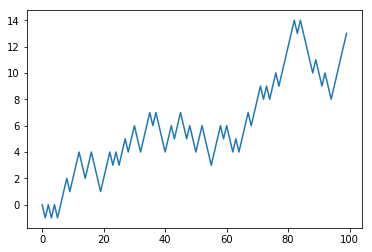

In [237]:
# 我们通过模拟随机漫步来说明如何运用数组运算。先来看一个简单的随机漫步 的例子：从 0 开始，步长 1 和－1 出现的概率相等
# 下面是一个通过内置的 random 模块以纯 Python 的方式实现 1000 步的随机漫 步：
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
    
plt.plot(walk[:100]) #前 100 个随机漫步值生成的折线图

In [238]:
# 不难看出，这其实就是随机漫步中各步的累计和，可以用一个数组运算来实 现。因此，我用 np.random 模块一次性随机产生 1000 个“掷硬币”结果（即两 个数中任选一个），将其分别设置为 1 或－1，然后计算累计和
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [239]:
walk.min()

-9

In [240]:
walk.max()

60

In [241]:
#现在来看一个复杂点的统计任务——首次穿越时间，即随机漫步过程中第一次 到达某个特定值的时间。假设我们想要知道本次随机漫步需要多久才能距离初 始 0 点至少 10 步远（任一方向均可）。np.abs(walk)>=10 可以得到一个布尔 型数组，它表示的是距离是否达到或超过 10，而我们想要知道的是第一个 10 或－10 的索引。可以用 argmax 来解决这个问题，它返回的是该布尔型数组第 一个最大值的索引（True 就是最大值）
(np.abs(walk) >= 10).argmax()
#注意，这里使用 argmax 并不是很高效，因为它无论如何都会对数组进行完全扫 描。在本例中，只要发现了一个 True，那我们就知道它是个最大值了。

297

#### 一次模拟多个随机漫步

In [242]:
# 如果你希望模拟多个随机漫步过程（比如 5000 个），只需对上面的代码做一点 点修改即可生成所有的随机漫步过程。只要给 numpy.random 的函数传入一个二 元元组就可以产生一个二维数组，然后我们就可以一次性计算 5000 个随机漫步 过程（一行一个）的累计和了
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) #0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]])

In [243]:
# 现在，我们来计算所有随机漫步过程的最大值和最小值
walks.max()

122

In [244]:
walks.min()

-128

In [245]:
# 得到这些数据之后，我们来计算 30 或－30 的最小穿越时间。这里稍微复杂 些，因为不是 5000 个过程都到达了 30。我们可以用 any 方法来对此进行检 查：
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [246]:
hits30.sum() #number that hit 30 or -30

3368

In [247]:
# 然后我们利用这个布尔型数组选出那些穿越了 30（绝对值）的随机漫步 （行），并调用 argmax 在轴 1 上获取穿越时间
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [248]:
crossing_times.mean()

509.99762470308787

In [250]:
# 请尝试用其他分布方式得到漫步数据。只需使用不同的随机数生成函数即可， 如 normal 用于生成指定均值和标准差的正态分布数据：
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))